In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

To make all money features reasonable for the calculations I will use data from "US Consumer Calculator" (https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/).
This data contains CPI (Consumer Price Index) from 1913 to 2020.
This data will be uploaded into SQL server and used to improve revenue, budget and calculations based on those variables.

In [72]:
from bs4 import BeautifulSoup
import requests

url = "http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, 'html.parser')

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2020:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "year": years,
    "avg_annual_cpi": cpis
})

cpi_table.head()
cpi_table.to_csv("../../Data/cpi_table.csv")

Movies_v1.csv file contains data about movies extracted from the BoxOffice database

In [82]:
pd.set_option('display.max_columns', None)
movies = pd.read_csv("../../Data/Movies_v2.csv")
movies.head()

,original_title,revenue,budget,popularity,actors_cnt,original_language,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_date,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,runtime_cat,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
0,Hot Tub Time Machine 2,13283126.0,15101018.0,6.575393,24,en,1,0,0,0,0,0,0,2015-02-20,2015.0,2.0,8.0,6.0,93.0,9.0,Intermediate,0,4,72.0,2.0,4.0,12.0,10.0,0.0,0.0,9.0,0.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53164966.0,71823535.0,2.0,2.0,5.0,3.0,2.0,46134285.0,15843947.0,1.0,0.0,7.0,3.0,2.0,55244499.0,36507326.0,2.0,0.0,6.0,2.0,2.0,33274115.0,0.0,30658668.0,0.0,101192633.0,1.0,12314651.0,0.0
1,The Princess Diaries 2: Royal Engagement,128775114.0,54135945.0,8.248895,20,en,1,0,0,0,0,0,0,2004-08-06,2004.0,8.0,32.0,6.0,113.0,11.0,Intermediate,0,4,9.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,311294147.0,500188435.0,6.0,1.0,7.0,1.0,1.0,75729062.0,NaN,4.0,0.0,7.0,0.0,1.0,83349050.0,72927633.0,4.0,1.0,9.0,2.0,2.0,113707282.0,3.0,48418160.0,0.0,118162119.0,2.0,NaN,0.0
2,Whiplash,14138371.0,3563751.0,64.299990,51,en,1,0,0,0,0,0,0,2014-10-10,2014.0,10.0,41.0,6.0,105.0,11.0,Intermediate,0,12,64.0,1.0,3.0,5.0,9.0,0.0,0.0,18.0,0.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,54445557.0,64308856.0,2.0,2.0,6.0,5.0,2.0,96743556.0,185404757.0,9.0,1.0,25.0,6.0,2.0,31820076.0,31820076.0,0.0,0.0,2.0,2.0,1.0,13092000.0,0.0,13092000.0,0.0,43944921.8,2.0,31450731.5,1.0
3,Kahaani,17816284.0,1336221.0,3.174936,7,hi,0,0,0,0,0,0,0,2012-03-09,2012.0,3.0,10.0,6.0,122.0,12.0,Long,0,7,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,10050000.0,NaN,0.0,0.0,2.0,0.0,1.0,7083026.0,2624539.0,0.0,0.0,3.0,2.0,2.0,16000000.0,NaN,0.0,0.0,1.0,0.0,0.0,16000000.0,0.0,NaN,0.0,16000000.0,0.0,NaN,0.0
4,????,4676072.0,0.0,1.148070,4,ko,0,0,0,0,0,0,0,2009-02-05,2009.0,2.0,6.0,5.0,118.0,12.0,Intermediate,0,0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,1963155.0,2340.0,0.0,0.0,2.0,1.0,2.0,3923970.0,NaN,0.0,0.0,1.0,0.0,2.0,3923970.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN



# Exploratory data analysis:



#### Data Set types :

In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   original_title                     7398 non-null   object 
 1   revenue                            3000 non-null   float64
 2   budget                             7397 non-null   float64
 3   popularity                         7398 non-null   float64
 4   actors_cnt                         7398 non-null   int64  
 5   original_language                  7398 non-null   object 
 6   language_en                        7398 non-null   int64  
 7   language_fr                        7398 non-null   int64  
 8   language_es                        7398 non-null   int64  
 9   language_de                        7398 non-null   int64  
 10  language_ru                        7398 non-null   int64  
 11  language_it                        7398 non-null   int64

#### 1. Describe the data with descriptive statistics (use concentration and dispersion indices)

In [84]:
pd.set_option('display.max_columns', None)
movies.describe()


,revenue,budget,popularity,actors_cnt,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
count,3.000000e+03,7.397000e+03,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7398.000000,7397.000000,7397.000000,7397.000000,7397.000000,7392.000000,7392.000000,7398.000000,7398.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.0,7360.0,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,7375.000000,5.934000e+03,3.588000e+03,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5.878000e+03,3.161000e+03,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5.736000e+03,2.845000e+03,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5.513000e+03,5513.000000,1.657000e+03,5513.000000,4.958000e+03,4958.000000,2.494000e+03,4958.000000
mean,1.027190e+08,3.209883e+07,8.514968,19.129630,0.858475,0.026899,0.012841,0.006623,0.014734,0.007570,0.012165,1999.677031,6.842909,28.214411,4.963904,107.717262,10.830628,0.027845,7.256150,24.400815,2.218614,1.663723,2.699728,3.056658,0.0,0.0,5.288995,0.000679,1.797418,0.425136,1.512908,0.235254,0.151322,0.051797,0.353220,0.146983,0.029966,0.498441,0.091525,0.085153,0.011390,0.040000,0.099661,0.036203,0.074576,0.194576,0.100881,0.253424,0.000136,0.032949,0.015864,2.503322,1.021727e+08,1.710441e+08,3.560499,0.651837,8.507415,1.392147,1.668015,9.351582e+07,1.616335e+08,2.579449,0.513100,6.638653,1.178122,1.468697,9.001136e+07,1.502975e+08,2.219142,0.444212,5.897838,1.047943,1.487448,7.427380e+07,0.928895,1.161136e+08,0.144567,9.026067e+07,1.567568,1.348382e+08,0.261799
std,1.963614e+08,4.960608e+07,12.165794,17.777616,0.348586,0.161800,0.112597,0.081120,0.120493,0.086679,0.109632,15.370147,3.386287,14.784315,1.449966,21.480040,2.165771,0.164541,6.275023,28.157965,1.627544,1.365062,4.114980,4.512479,0.0,0.0,5.268008,0.030834,2.586904,1.234043,1.736821,0.424186,0.358387,0.221631,0.478003,0.354113,0.170505,0.500031,0.288374,0.279127,0.106121,0.195972,0.299568,0.186809,0.262724,0.395901,0.301192,0.435001,0.011644,0.178516,0.124959,1.112085,1.002851e+08,2.262900e+08,3.545276,1.036881,6.361056,1.608195,0.567088,9.878081e+07,2.312369e+08,2.895033,0.921681,5.540460,1.505845,0.627450,1.036156e+08,2.176075e+08,2.658852,0.854971,5.148063,1.446387,0.646241,1.172998e+08,1.510734,1.906442e+08,0.439723,1.145239e+08,2.418611,1.838122e+08,0.652455
min,1.000000e+00,0.000000e+00,0.0

#### 2. Graphs depicting the behavior of each variable.


In [85]:

import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(movies)

#display the report
advert_report.show_html ('movies_eda_before_cleansing.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:16  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:18  -> (00:00 left)


Creating Associations graph... DONE!
Report movies_eda_before_cleansing.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


##### Link to the dataset analyze output made with sweetviz library: 

In [96]:
from IPython.display import FileLink
FileLink('movies_eda_before_cleansing.html')

C:\Users\ytsat\Documents\DataScience\stats\Statistics_excercise\movies_eda_before_cleansing.html

#### 3. Correlation matrix presented with seaborn heatmap (filtered to show corellations bigger than 0.5)

In [97]:
corrMatrix = movies.corr()
corrMatrix

,revenue,budget,popularity,actors_cnt,language_en,language_fr,language_es,language_de,language_ru,language_it,language_ja,release_year,release_month,release_week,release_weekday,runtime,runtime_intervals,is_collection,keywords_cnt,crew_total_cnt,crew_writing_cnt,crew_directing_cnt,crew_art_cnt,crew_sound_cnt,crew_costume_makeup_cnt,crew_visual_effects_cnt,crew_production_cnt,crew_actors_cnt,crew_camera_cnt,crew_lighting_cnt,crew_editing_cnt,sw_genre_action,sw_genre_adventure,sw_genre_animation,sw_genre_comedy,sw_genre_crime,sw_genre_documentary,sw_genre_drama,sw_genre_family,sw_genre_fantasy,sw_genre_foreign,sw_genre_history,sw_genre_horror,sw_genre_music,sw_genre_mystery,sw_genre_romance,sw_genre_science_fiction,sw_genre_thriller,sw_genre_tv_movie,sw_genre_war,sw_genre_western,genres_total,actor0_avg_revenue,actor0_avg_revenue_5y,actor0_blockbusters,actor0_blockbusters_5y,actor0_movies,actor0_movies_5y,actor0_gender,actor1_avg_revenue,actor1_avg_revenue_5y,actor1_blockbusters,actor1_blockbusters_5y,actor1_movies,actor1_movies_5y,actor1_gender,actor2_avg_revenue,actor2_avg_revenue_5y,actor2_blockbusters,actor2_blockbusters_5y,actor2_movies,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
revenue,1.000000,0.633540,0.383885,0.309669,0.162526,-0.065076,-0.055868,-0.030717,-0.060608,-0.030433,-0.036168,-0.064265,0.050166,0.054467,-0.112382,0.254795,0.250680,0.089244,0.223535,0.326929,0.253774,0.195297,0.318283,0.261954,NaN,NaN,0.230516,0.014557,0.255853,0.211992,0.285596,0.166795,0.317607,0.108256,-0.043152,-0.025717,-0.085219,-0.134713,0.144476,0.144711,-0.052144,-0.009178,-0.020146,-0.004946,-0.012556,-0.036794,0.102584,0.016379,-0.003212,-0.008163,0.007203,0.162113,0.367458,0.209238,0.270592,0.145851,0.163364,0.065917,0.118194,0.401799,0.217438,0.256179,0.140475,0.147916,0.079912,0.101025,0.463105,0.291461,0.252126,0.163773,0.139831,0.079098,0.094825,0.717587,0.502253,0.654543,0.308514,0.763644,0.353422,0.611014,0.237014
budget,0.633540,1.000000,0.294563,0.262193,0.198994,-0.082116,-0.065323,0.000575,-0.067735,-0.046935,-0.052591,0.050517,0.055073,0.058560,-0.094778,0.266467,0.262281,0.089615,0.221270,0.428276,0.284912,0.211559,0.448442,0.335630,NaN,NaN,0.298849,0.019876,0.323206,0.298408,0.340057,0.257437,0.357904,0.141905,-0.061598,-0.004356,-0.108429,-0.168862,0.181971,0.211055,-0.065740,0.040793,-0.087483,-0.020787,0.017118,-0.089324,0.198372,0.054429,-0.005638,0.040793,0.021165,0.251582,0.260312,0.149928,0.336846,0.213736,0.264011,0.171155,0.155674,0.281784,0.179208,0.288069,0.190999,0.229356,0.147681,0.119249,0.336819,0.249640,0.310396,0.225856,0.243115,0.180524,0.097908,0.490330,0.387970,0.518137,0.232300,0.559347,0.331259,0.486867,0.208100
popularity,0.383885,0.294563,1.000000,0.241711,0.120241,-0.035355,-0.027778,-0.021722,-0.065673,-0.015752,-0.005967,0.102092,0.019595,0.022542,-0.051846,0.112664,0.109776,0.081688,0.184583,0.317762,0.160239,0.157627,0.286426,0.238611,NaN,NaN,0.240118,0.008379,0.262153,0.221234,0.239952,0.104250,0.146726,0.079470,-0.044130,0.020223,-0.080670,-0.073345,0.068732,0.098178,-0.067070,-0.005603,0.012253,-0.027499,0.023181,-0.063047,0.098666,0.056662,-0.003244,0.013446,0.003161,0.113167,0.176131,0.107842,0.146837,0.148806,0.112010,0.142301,0.064670,0.172540,0.064805,0.137368,0.158095,0.111942,0.168486,0.067634,0.210865,0.129100,0.140532,0.138907,0.102123,0.119023,0.071548,0.341468,0.207197,0.301026,0.212877,0.310004,0.155515,0.230971,0.212319
actors_cnt,0.309669,0.262193,0.241711,1.000000,0.126479,-0.025182,-0.015487,-0.020000,-0.065329,-0.014674,-0.025572,0.029729,0.040185,0.041428,-0.041348,0.214473,0.213084,0.071603,0.198248,0.336588,0.174665,0.216268,0.312263,0.265958,NaN,NaN,0.313516,0.019062,0.273843,0.199591,0.282112,0.085903,0.076234,-0.047157,0.011640,0.042866,-0.12

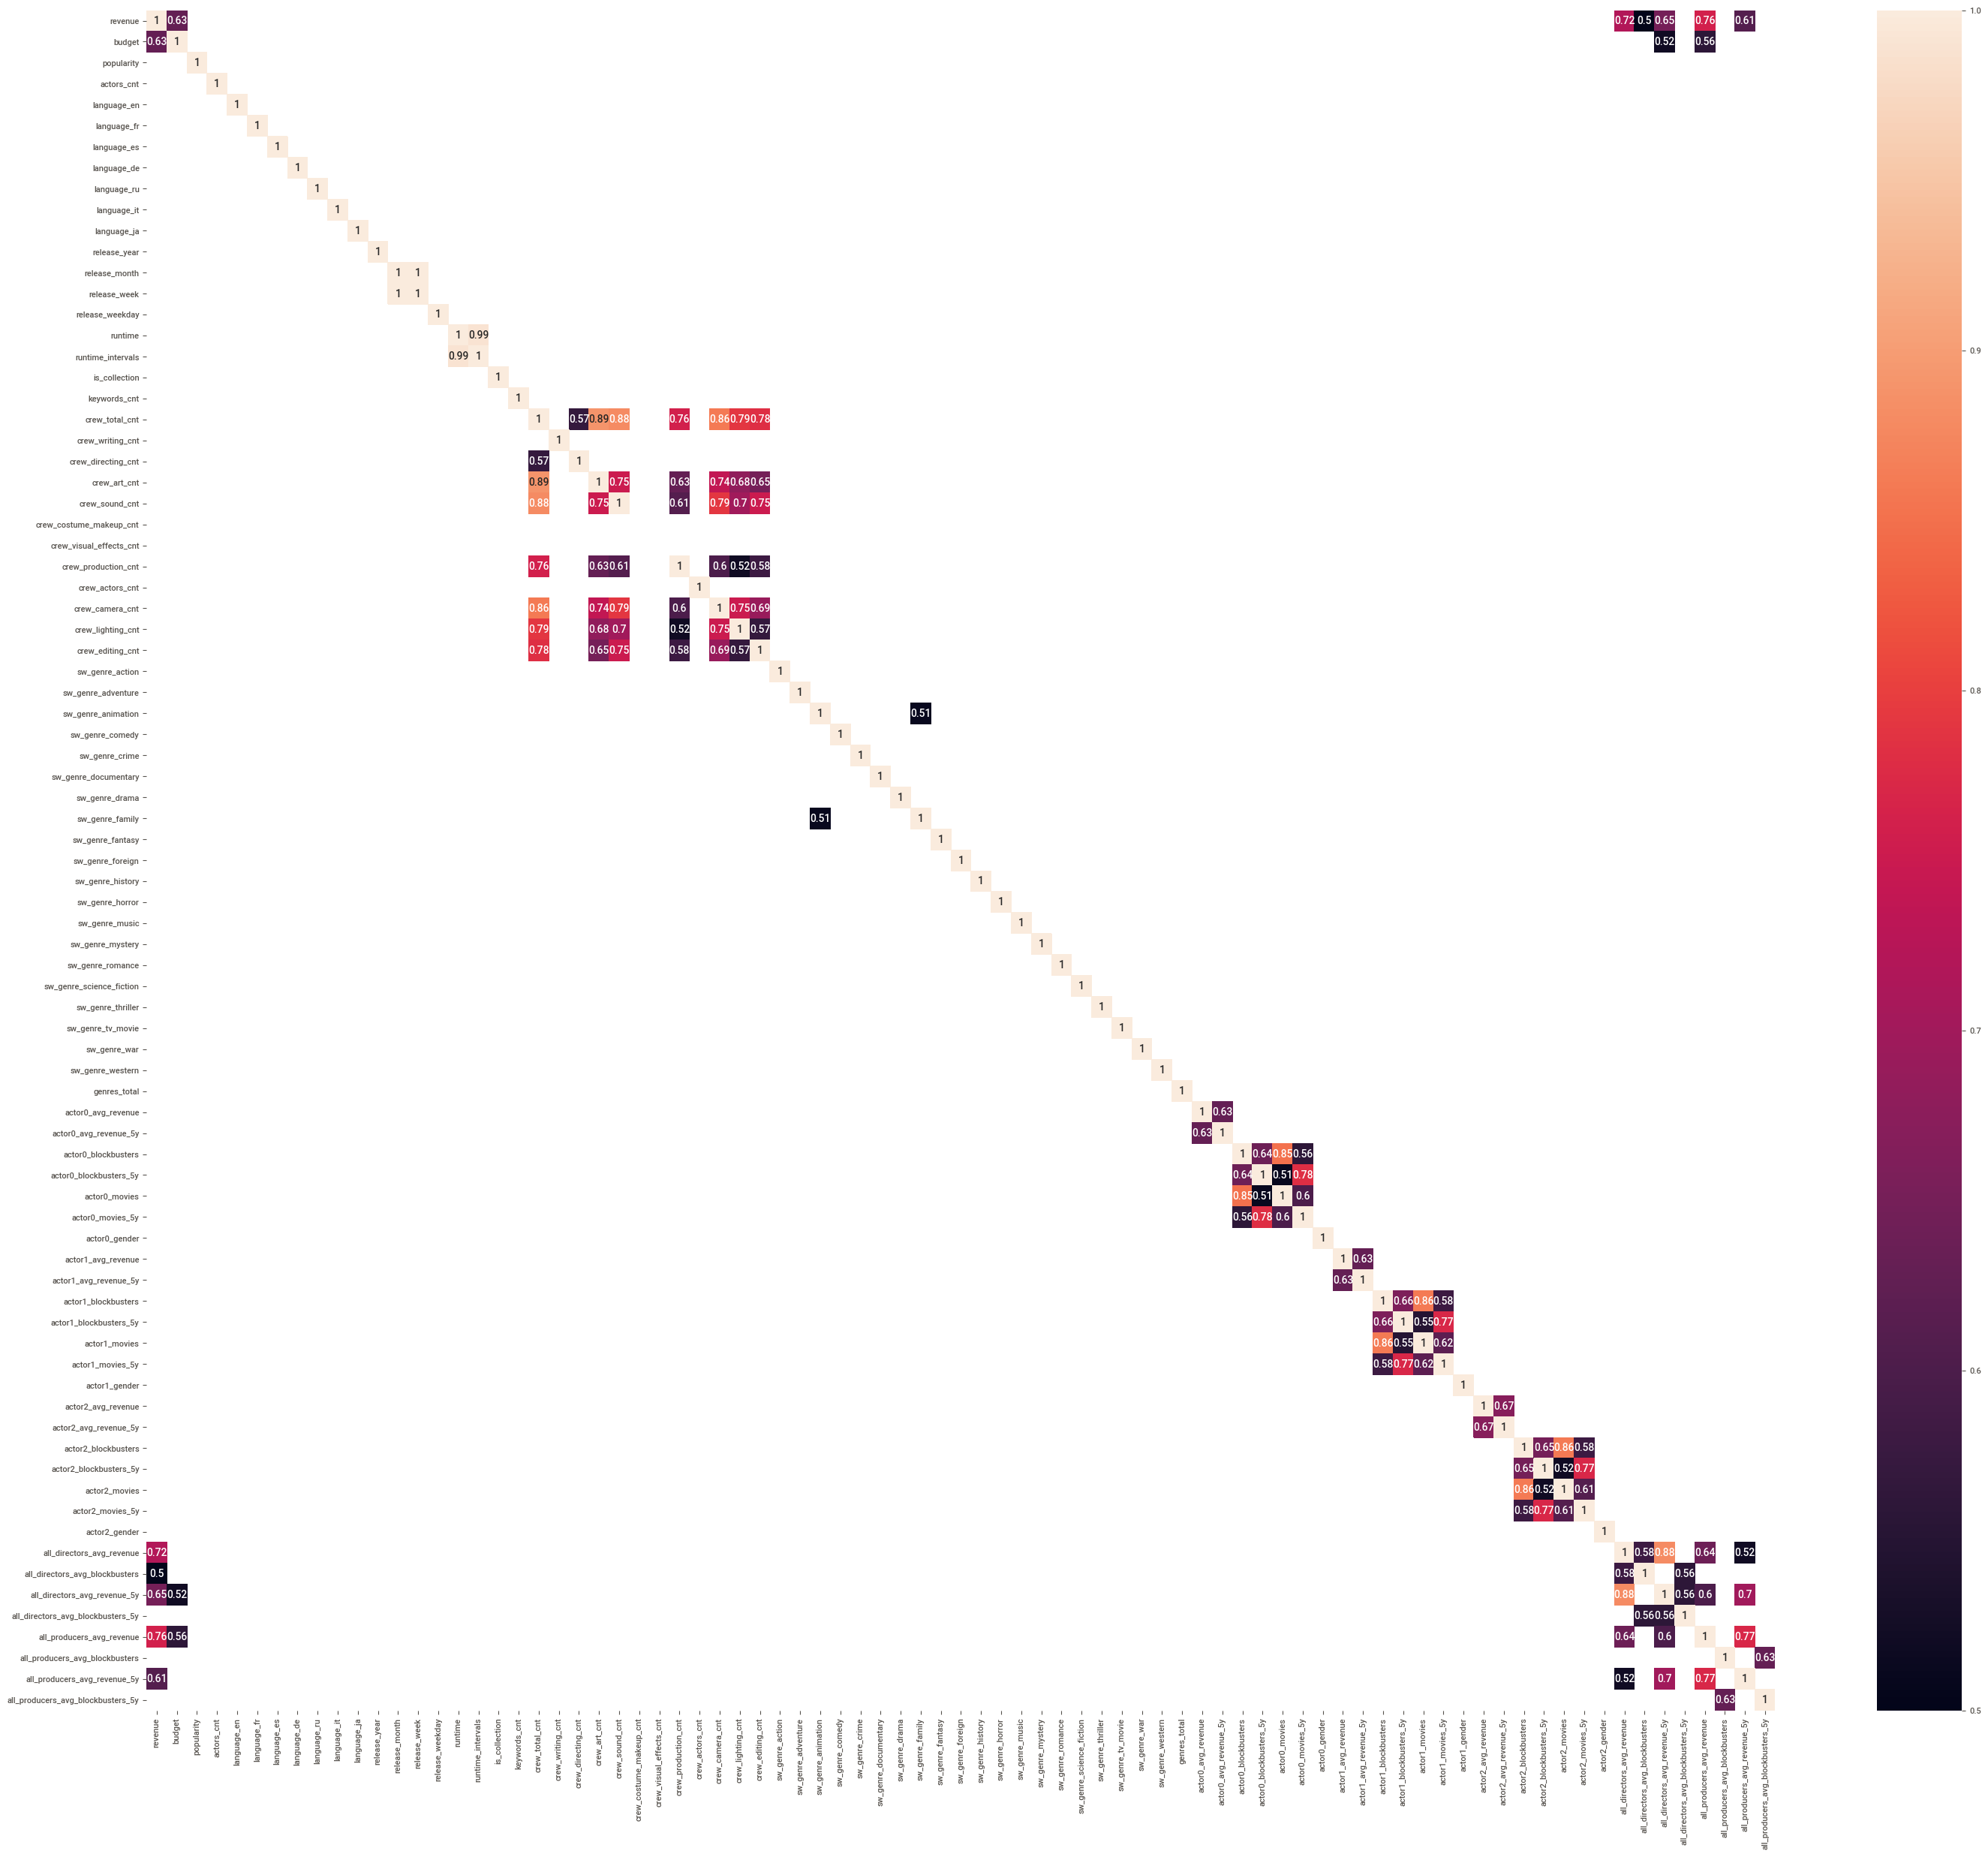

In [98]:
movies_corr_matrix = movies.corr().round(2)
kot = movies_corr_matrix[abs(movies_corr_matrix)>=.5]
plt.figure(figsize=(35,30))
sns.heatmap(kot, annot=True)
plt.show()


#### Corellation of outcome variable with all other variables: 

In [99]:
pd.set_option('display.max_rows', None)
revenue_correlations = movies[movies.columns[1:]].corr()['revenue'][:]
revenue_correlations.sort_values(ascending=False)

revenue                              1.000000
all_producers_avg_revenue            0.763644
all_directors_avg_revenue            0.717587
all_directors_avg_revenue_5y         0.654543
budget                               0.633540
all_producers_avg_revenue_5y         0.611014
all_directors_avg_blockbusters       0.502253
actor2_avg_revenue                   0.463105
actor1_avg_revenue                   0.401799
popularity                           0.383885
actor0_avg_revenue                   0.367458
all_producers_avg_blockbusters       0.353422
crew_total_cnt                       0.326929
crew_art_cnt                         0.318283
sw_genre_adventure                   0.317607
actors_cnt                           0.309669
all_directors_avg_blockbusters_5y    0.308514
actor2_avg_revenue_5y                0.291461
crew_editing_cnt                     0.285596
actor0_blockbusters                  0.270592
crew_sound_cnt                       0.261954
actor1_blockbusters               

#### 4. Describe the target variable (revenue) - how is it distributed? 
#### Are there categories that show a large difference in the distribution of the target variable?


              Distribution of revenue all movies and inside different categories (genre, runtime, release year) 

Text(0.5, 1.0, '2010-2020')

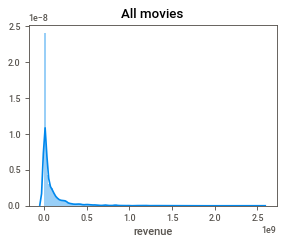

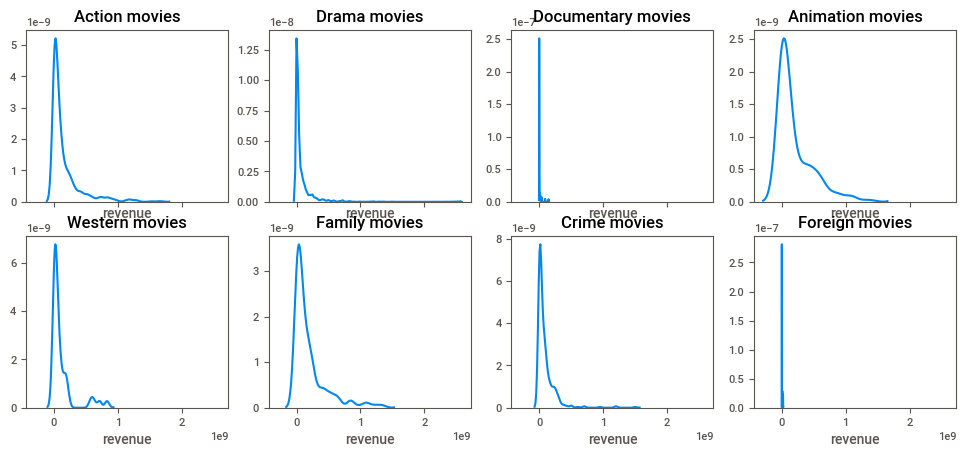

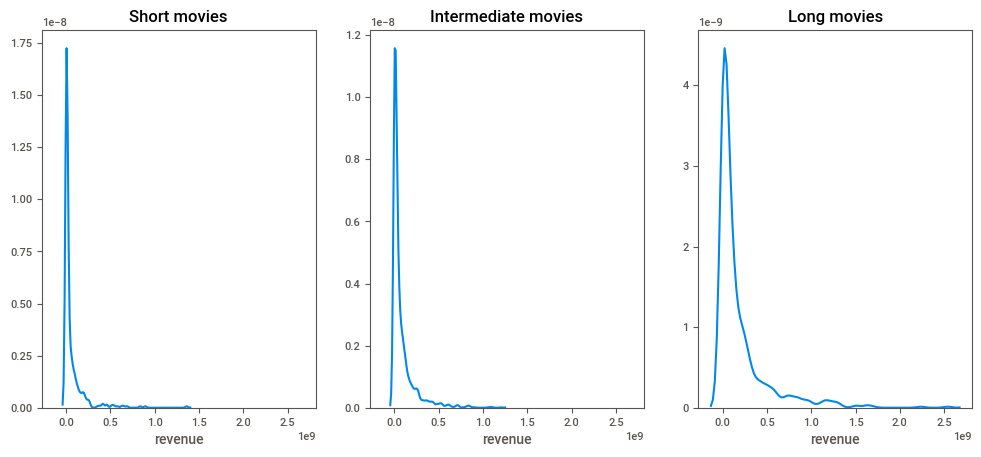

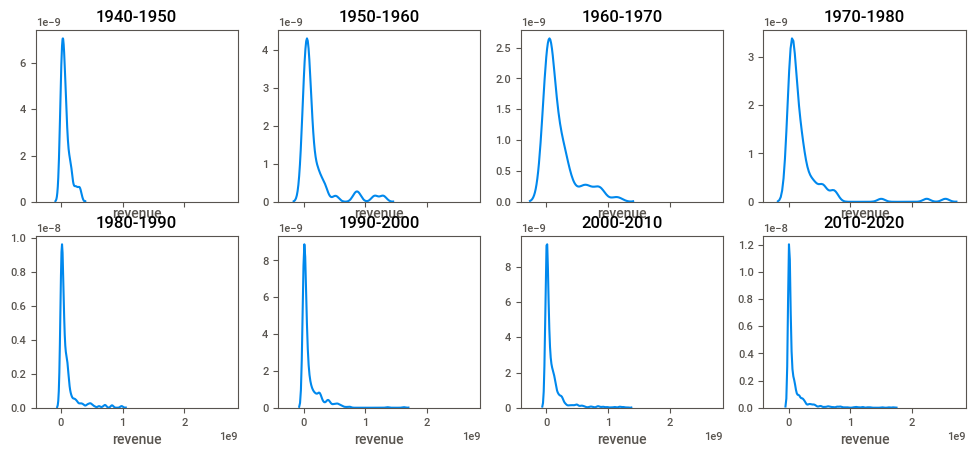

In [101]:
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(movies.revenue, hist=True, kde=True,  bins=int(150)).set_title("All movies")

f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.sw_genre_action == 1], hist=False, kde=True, ax=axes[0,0]).set_title("Action movies")
sns.distplot(movies.revenue[movies.sw_genre_drama == 1], hist=False, kde=True, ax=axes[0,1]).set_title("Drama movies")
sns.distplot(movies.revenue[movies.sw_genre_documentary == 1], hist=False, kde=True, ax=axes[0,2]).set_title("Documentary movies")
sns.distplot(movies.revenue[movies.sw_genre_animation == 1], hist=False, kde=True, ax=axes[0,3]).set_title("Animation movies")
sns.distplot(movies.revenue[movies.sw_genre_western == 1], hist=False, kde=True, ax=axes[1,0]).set_title("Western movies")
sns.distplot(movies.revenue[movies.sw_genre_family == 1], hist=False, kde=True, ax=axes[1,1]).set_title("Family movies")
sns.distplot(movies.revenue[movies.sw_genre_crime == 1], hist=False, kde=True, ax=axes[1,2]).set_title("Crime movies")
sns.distplot(movies.revenue[movies.sw_genre_foreign == 1], hist=False, kde=True, ax=axes[1,3]).set_title("Foreign movies")

f, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[movies.runtime_cat == 'Short'], hist=False, kde=True, ax=axes[0]).set_title("Short movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Intermediate'], hist=False, kde=True, ax=axes[1]).set_title("Intermediate movies")
sns.distplot(movies.revenue[movies.runtime_cat == 'Long'], hist=False, kde=True, ax=axes[2]).set_title("Long movies")


f, axes = plt.subplots(2, 4, figsize=(12, 5), sharex=True)
sns.distplot(movies.revenue[(movies.release_year > 1940) & (movies.release_year <= 1950)], hist=False, kde=True, ax=axes[0,0]).set_title("1940-1950")
sns.distplot(movies.revenue[(movies.release_year > 1950) & (movies.release_year <= 1960)], hist=False, kde=True, ax=axes[0,1]).set_title("1950-1960")
sns.distplot(movies.revenue[(movies.release_year > 1960) & (movies.release_year <= 1970)], hist=False, kde=True, ax=axes[0,2]).set_title("1960-1970")
sns.distplot(movies.revenue[(movies.release_year > 1970) & (movies.release_year <= 1980)], hist=False, kde=True, ax=axes[0,3]).set_title("1970-1980")
sns.distplot(movies.revenue[(movies.release_year > 1980) & (movies.release_year <= 1990)], hist=False, kde=True, ax=axes[1,0]).set_title("1980-1990")
sns.distplot(movies.revenue[(movies.release_year > 1990) & (movies.release_year <= 2000)], hist=False, kde=True, ax=axes[1,1]).set_title("1990-2000")
sns.distplot(movies.revenue[(movies.release_year > 2000) & (movies.release_year <= 2010)], hist=False, kde=True, ax=axes[1,2]).set_title("2000-2010")
sns.distplot(movies.revenue[(movies.release_year > 2010) & (movies.release_year <= 2020)], hist=False, kde=True, ax=axes[1,3]).set_title("2010-2020")


Looks like distribution of revenue is Poisson and the same for different categories

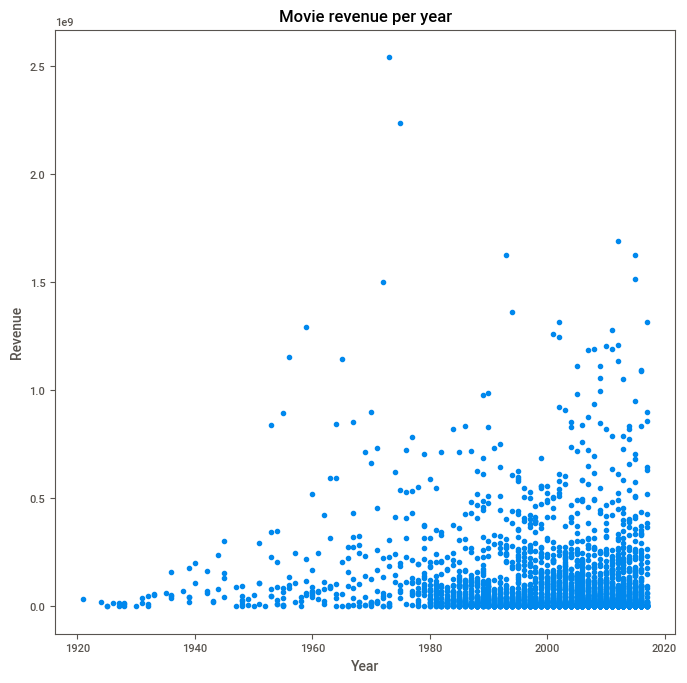

In [105]:
plt.figure(figsize=(8, 8))
plt.scatter(movies.release_year, movies.revenue)
plt.title('Movie revenue per year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

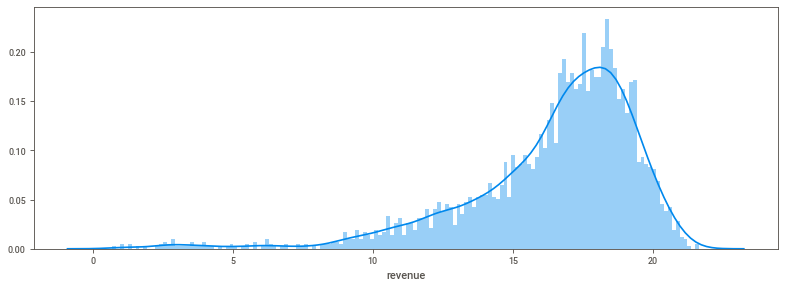

In [102]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(np.log(movies.revenue+1), hist=True, kde=True,  bins=int(150))

#### 5. Create graphs that can help you check for extreme data. Describe them.

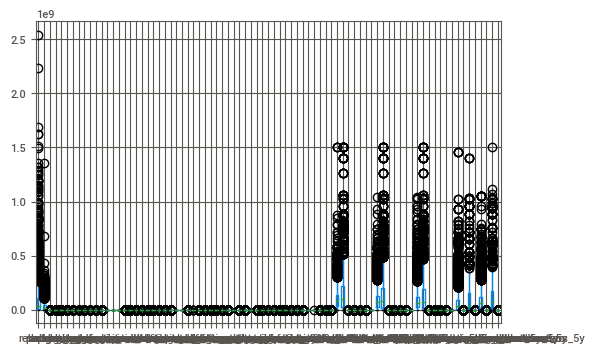

In [103]:
#fig, axs = plt.subplots(2, 3)

# horizontal boxes
#axs[0, 0].boxplot(x='revenue', data=movies[movies.sw_genre_fantasy==1], orient='h')
#axs[0, 0].set_title('horizontal boxes')


boxplot = movies.boxplot()

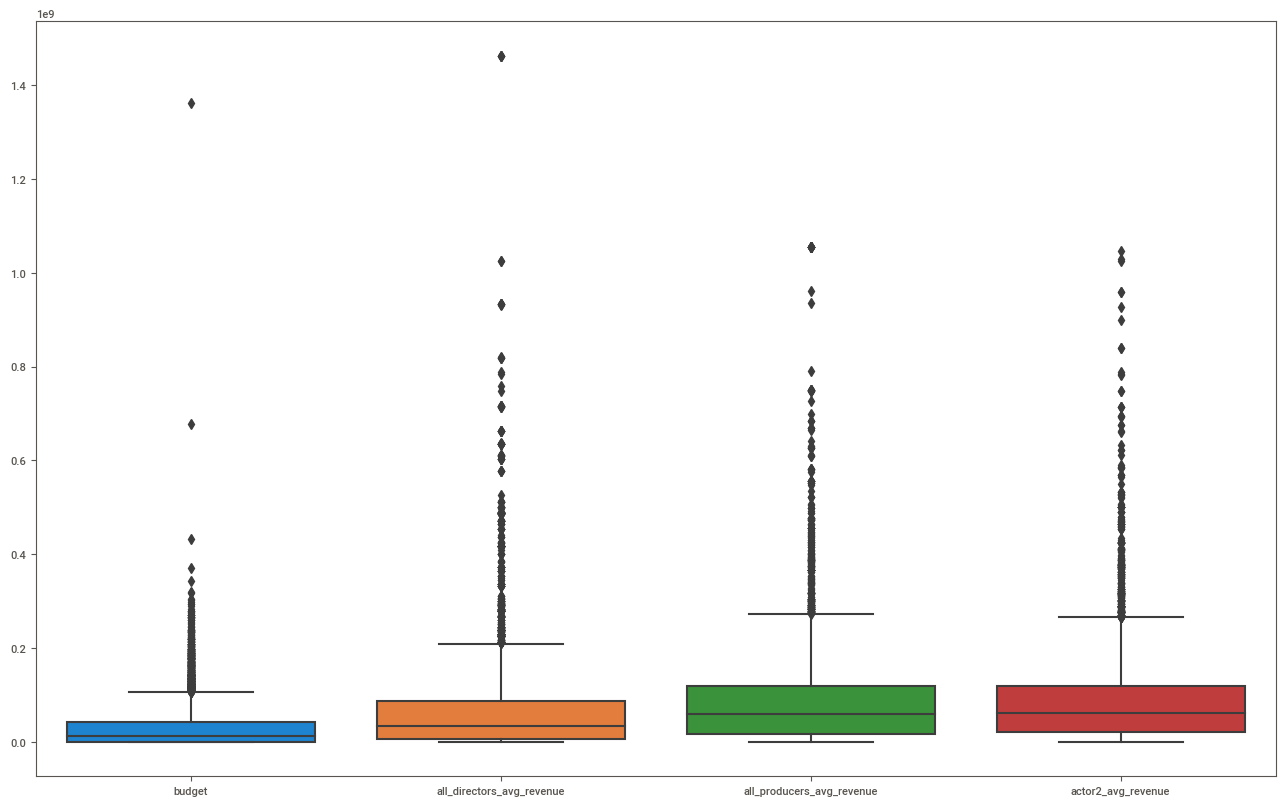

In [104]:

movies_f = movies[['budget', 'all_directors_avg_revenue','all_producers_avg_revenue', 'actor2_avg_revenue']].copy()

plt.figure(figsize=(16, 10))
sns.boxplot(data=movies_f)

### There is a huge difference between the blockbusters and average movies in budgets, revenues, crew etc.

In [ ]:
### 6. Describe the missing data: Which variables have missing data? Some?

na_variables = movies.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(na_variables)

### There is a small amount of records (~20) with missing data in "runtime", "crew_..." and "sw_genres_..."  variables.
### There are more lack of data in calculated variables like "actor0_avg_revenue" and "all_directors_avg_revenue_5y".
### It seems normal because not all director or actor prticipated in movie that made revenue, in special during last 5 years
### All NaNs will be replaced with 0.    


In [ ]:
#### 7. Create a matrix of gaps (create a dataframe with the same dimensions from the source table and cells that are missing put a value of one and those that have data have a zero value). 
#### Show the matrix in the heatmap graph.

In [ ]:


### pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = animals.columns[animals.isnull().any()].tolist()
msno.matrix(animals[missingdata_df])

plt.figure(figsize=(25,20))
sns.heatmap(movies.isnull(), cbar=False)



In [ ]:



###   Extreme data




In [ ]:
###### 1. In variables where extreme values are found, check the distribution of the variable with and without the extreme values. 
### Does the distribution change?


### Distribution of original budget and 'all directors average revenue'
### Distribution of budget and 'all directors average revenue' without outliers

movies_t = movies[['revenue', 'budget', 'all_directors_avg_revenue']].copy()
movies_t.insert(2, "budget_05", movies.budget[movies.budget.between(movies.budget.quantile(.05), movies.budget.quantile(.95))], True) 
movies_t.insert(3, "all_directors_avg_revenue_05", movies.all_directors_avg_revenue[movies.all_directors_avg_revenue.between(movies.all_directors_avg_revenue.quantile(.05), movies.all_directors_avg_revenue.quantile(.95))], True) 

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.distplot(movies_t.budget , color="skyblue", ax=axes[0,0])
sns.distplot(movies_t.all_directors_avg_revenue , color="olive", ax=axes[0,1])
sns.distplot(movies_t.budget_05 , color="skyblue", ax=axes[1,0])
sns.distplot(movies_t.all_directors_avg_revenue_05 , color="olive", ax=axes[1,1])



In [ ]:
## 2. Create a scatter graph with the variables in the previous question in X and the target variable in Y. 
### Do extreme values in variable X affect the behavior of variable Y? Do you see differences with or without extreme values?

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.scatterplot(data = movies_t, x="budget", y="revenue" , color="skyblue", ax=axes[0,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue", y="revenue" , color="olive", ax=axes[0,1])
sns.scatterplot(data = movies_t, x="budget_05", y="revenue" , color="skyblue", ax=axes[1,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue_05", y="revenue" , color="olive", ax=axes[1,1])

In [ ]:
### 3. In what variables would you delete the extreme values? How would you delete them? Necrosis.

### ???


In [ ]:
### 4. Act on the data according to what you defined in the previous question.



In [ ]:
### Missing data
### For each variable with missing data, you will see the distribution of other variables with or without missing. 
### Use the missing matrix you created in part 2, question 7 for the missing / no indication. 
### For the distribution, use a histogram or density graph with category / color as indicated.

movies_nan_free = movies[['crew_total_cnt', 'genres_total']].copy()
movies_nan_free = movies_nan_free.dropna()
movies_nan_free.genres_total = movies_nan_free.genres_total.astype(int)

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.distplot(movies.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,0])
sns.distplot(movies_nan_free.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,1])
sns.distplot(movies.genres_total, hist=False, color="olive", ax=axes[1,0])
sns.distplot(movies_nan_free.genres_total, hist=False, color="olive", ax=axes[1,1])

### 

In [ ]:
movies = movies.dropna(subset=['crew_total_cnt','crew_writing_cnt','crew_directing_cnt','crew_art_cnt','crew_sound_cnt','crew_costume_makeup_cnt','crew_visual_effects_cnt','crew_production_cnt','crew_actors_cnt','crew_camera_cnt','crew_lighting_cnt','crew_editing_cnt'])
movies = movies.dropna(subset=['sw_genre_action','sw_genre_adventure','sw_genre_animation','sw_genre_comedy','sw_genre_crime','sw_genre_documentary','sw_genre_drama','sw_genre_family','sw_genre_fantasy','sw_genre_foreign','sw_genre_history','sw_genre_horror','sw_genre_music','sw_genre_mystery','sw_genre_romance','sw_genre_science_fiction','sw_genre_thriller','sw_genre_tv_movie','sw_genre_war','sw_genre_western','genres_total'])

movies = movies.fillna(0)



In [ ]:


movies.original_language = pd.Categorical(movies.original_language)
movies.language_en = pd.Categorical(movies.language_en)
movies.language_fr = pd.Categorical(movies.language_fr)
movies.language_es = pd.Categorical(movies.language_es)
movies.language_de = pd.Categorical(movies.language_de)
movies.language_ru = pd.Categorical(movies.language_ru)
movies.language_it = pd.Categorical(movies.language_it)
movies.language_ja = pd.Categorical(movies.language_ja)
movies.runtime_intervals = pd.Categorical(movies.runtime_intervals)
movies.runtime_cat = pd.Categorical(movies.runtime_cat)
movies.is_collection = pd.Categorical(movies.is_collection)
movies.sw_genre_action = pd.Categorical(movies.sw_genre_action)
movies.sw_genre_adventure = pd.Categorical(movies.sw_genre_adventure)
movies.sw_genre_animation = pd.Categorical(movies.sw_genre_animation)
movies.sw_genre_comedy = pd.Categorical(movies.sw_genre_comedy)
movies.sw_genre_crime = pd.Categorical(movies.sw_genre_crime)
movies.sw_genre_documentary = pd.Categorical(movies.sw_genre_documentary)
movies.sw_genre_drama = pd.Categorical(movies.sw_genre_drama)
movies.sw_genre_family = pd.Categorical(movies.sw_genre_family)
movies.sw_genre_fantasy = pd.Categorical(movies.sw_genre_fantasy)
movies.sw_genre_foreign = pd.Categorical(movies.sw_genre_foreign)
movies.sw_genre_history = pd.Categorical(movies.sw_genre_history)
movies.sw_genre_horror = pd.Categorical(movies.sw_genre_horror)
movies.sw_genre_music = pd.Categorical(movies.sw_genre_music)
movies.sw_genre_mystery = pd.Categorical(movies.sw_genre_mystery)
movies.sw_genre_romance = pd.Categorical(movies.sw_genre_romance)
movies.sw_genre_science_fiction = pd.Categorical(movies.sw_genre_science_fiction)
movies.sw_genre_thriller = pd.Categorical(movies.sw_genre_thriller)
movies.sw_genre_tv_movie = pd.Categorical(movies.sw_genre_tv_movie)
movies.sw_genre_war = pd.Categorical(movies.sw_genre_war)
movies.sw_genre_western = pd.Categorical(movies.sw_genre_western)
movies.actor0_gender = pd.Categorical(movies.actor0_gender)
movies.actor1_gender = pd.Categorical(movies.actor1_gender)
movies.actor2_gender = pd.Categorical(movies.actor2_gender)

movies.release_year = movies.release_year.astype(int)
movies.release_month = movies.release_month.astype(int)
movies.release_week = movies.release_week.astype(int)
movies.release_weekday = movies.release_weekday.astype(int)
movies.runtime = movies.runtime.astype(int)
movies.crew_total_cnt = movies.crew_total_cnt.astype(int)
movies.crew_actors_cnt = movies.crew_actors_cnt.astype(int)
movies.crew_art_cnt = movies.crew_art_cnt.astype(int)
movies.crew_camera_cnt = movies.crew_camera_cnt.astype(int)
movies.crew_costume_makeup_cnt = movies.crew_costume_makeup_cnt.astype(int)
movies.crew_directing_cnt = movies.crew_directing_cnt.astype(int)
movies.crew_editing_cnt = movies.crew_editing_cnt.astype(int)
movies.crew_lighting_cnt = movies.crew_lighting_cnt.astype(int)
movies.crew_production_cnt = movies.crew_production_cnt.astype(int)
movies.crew_sound_cnt = movies.crew_sound_cnt.astype(int)
movies.crew_visual_effects_cnt = movies.crew_visual_effects_cnt.astype(int)
movies.crew_writing_cnt = movies.crew_writing_cnt.astype(int)
movies.genres_total = movies.genres_total.astype(int)
movies.actor0_movies = movies.actor0_movies.astype(int)
movies.actor0_movies_5y = movies.actor0_movies_5y.astype(int)
movies.actor0_blockbusters = movies.actor0_blockbusters.astype(int)
movies.actor0_blockbusters_5y = movies.actor0_blockbusters_5y.astype(int)
movies.actor1_movies = movies.actor1_movies.astype(int)
movies.actor1_movies_5y = movies.actor1_movies_5y.astype(int)
movies.actor1_blockbusters = movies.actor1_blockbusters.astype(int)
movies.actor1_blockbusters_5y = movies.actor1_blockbusters_5y.astype(int)
movies.actor2_movies = movies.actor2_movies.astype(int)
movies.actor2_movies_5y = movies.actor2_movies_5y.astype(int)
movies.actor2_blockbusters = movies.actor2_blockbusters.astype(int)
movies.actor2_blockbusters_5y = movies.actor2_blockbusters_5y.astype(int)
movies.all_directors_avg_blockbusters = movies.all_directors_avg_blockbusters.astype(int)
movies.all_directors_avg_blockbusters_5y = movies.all_directors_avg_blockbusters_5y.astype(int)
movies.all_producers_avg_blockbusters= movies.all_producers_avg_blockbusters.astype(int)
movies.all_producers_avg_blockbusters_5y = movies.all_producers_avg_blockbusters_5y.astype(int)

